## Median/Drought Analysis -11/7/22

In [2]:
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
#from intake import open_catalog
import cartopy.io.shapereader as shpreader
import mygrads as mg
#import Ngl
#import Nio
#import fiona
import matplotlib as mpl
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.feature import NaturalEarthFeature
from cartopy.feature import COASTLINE
from clim680_function import xyticks
import pymannkendall as mk

In [2]:
#precipitation
#Normalized Anomalies
f='/project/xprecip/merra2_ncfiles/precip/anomalies/daily_precip_norm_anoms_noshift_10-6-22.nc'
DS_precip=xr.open_dataset(f)
lat_precip=DS_precip['lat']
lon_precip=DS_precip['lon']
norm_precip_anoms=DS_precip['PRECTOTCORR']
nlats=len(lat_precip)
nlons=len(lon_precip)
norm_precip_anoms

<xarray.DataArray 'PRECTOTCORR' (time: 3760, lat: 55, lon: 107)>
[22127600 values with dtype=float32]
Coordinates:
  * time       (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2021-02-28
  * lon        (lon) float64 -126.9 -126.2 -125.6 ... -61.88 -61.25 -60.62
  * lat        (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.5 49.0 49.5 50.0
    dayofyear  (time) int64 ...

In [4]:
#without any loop yet
xarray_sorted=norm_precip_anoms.argsort(axis=0,kind='quicksort')
xarray_sorted

<xarray.DataArray 'PRECTOTCORR' (time: 3760, lat: 55, lon: 107)>
array([[[2730,  328, 3715, ..., 1604, 3700, 3700],
        [2843,  328, 3306, ..., 1743, 1563, 1743],
        [2843, 2753, 2910, ..., 1743, 1743, 1743],
        ...,
        [1182,  796,  796, ..., 1469, 3545, 3545],
        [1634,  796,  796, ..., 3004, 3545, 3545],
        [1634,  796,  796, ..., 1469, 3004, 1379]],

       [[2910, 3306,   14, ..., 1694, 1605, 2617],
        [ 136, 3306,  328, ..., 2826, 1743, 1563],
        [2753,  136, 2730, ..., 2736, 1563, 1563],
        ...,
        [1183, 3233, 1067, ..., 3545, 1469, 1379],
        [1183, 1067, 1067, ..., 3545, 3004, 1379],
        [2085, 2601, 1067, ..., 2913, 1379, 3004]],

       [[ 835, 1140, 2541, ..., 1423, 1695, 1895],
        [2753, 1140, 3667, ..., 1924, 2556, 2556],
        [1670, 3746, 2188, ..., 2826, 2736, 2736],
        ...,
...
        ...,
        [ 964, 1756,  964, ..., 2345, 3442, 1649],
        [1756, 3612, 1647, ...,  691, 1649, 1512],
        [1757,  312,  964, ...,  966,  966, 3510]],

       [[3542, 3430, 1489, ..., 2361,  161, 2361],
        [1255, 1278, 3430, ..., 2361,  159, 2361],
        [1255, 1278, 1278, ..., 1202,  159,  159],
        ...,
        [3356, 3356, 1757, ..., 3152, 3152, 3442],
        [3356, 3356,  312, ..., 3152, 3152, 3152],
        [3612, 1621, 1757, ..., 1512, 1512, 1512]],

       [[1489, 1489, 3430, ..., 1202, 2361, 3698],
        [1489, 1489, 1489, ..., 1202, 1202, 1202],
        [1489, 1489, 1489, ...,  699, 1202, 1202],
        ...,
        [1756, 1757, 1647, ..., 1512, 1512, 3540],
        [1757, 1757, 1757, ..., 1512, 1512, 2345],
        [  69, 1757,  312, ..., 3152, 3152, 3152]]])
Coordinates:
  * time       (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2021-02-28
  * lon        (lon) float64 -126.9 -126.2 -125.6 ... -61.88 -61.25 -60.62
  * lat        (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.5 49.0 49.5 50.0
    dayofyear  (time) int64 1 2 3 4 5 6 7 8 9 10 ... 51 52 53 54 55 56 57 58 59

In [5]:
sorted_precip=norm_precip_anoms.where(xarray_sorted)
sorted_precip

<xarray.DataArray 'PRECTOTCORR' (time: 3760, lat: 55, lon: 107)>
array([[[-3.75228643e-01, -3.91993970e-01, -3.70777786e-01, ...,
          1.00258842e-01, -4.67205569e-02, -1.00477591e-01],
        [-4.17272270e-01, -3.79756302e-01, -3.84351522e-01, ...,
          1.42241910e-01, -6.48401007e-02, -7.90996328e-02],
        [-3.70610803e-01, -3.57019156e-01, -3.82032216e-01, ...,
          2.07185254e-01,  2.24112906e-02, -3.39414887e-02],
        ...,
        [-5.87371826e-01, -4.28017616e-01,  4.81225885e-02, ...,
         -6.52607083e-01, -6.76240802e-01, -6.71520710e-01],
        [-4.70628083e-01, -3.11334878e-01,  7.62946382e-02, ...,
         -6.26360238e-01, -6.78528905e-01, -6.96455956e-01],
        [-2.23637491e-01, -3.32901239e-01,  1.45105720e-01, ...,
         -5.22985756e-01, -5.48709452e-01, -5.86305857e-01]],

       [[-3.80044490e-01, -4.02059615e-01, -3.85174096e-01, ...,
          9.19298977e-02, -8.39806944e-02, -8.94241557e-02],
        [-4.12453562e-01, -3.80565614e-01, -3.90400946e-01, ...,
          2.77637094e-01,  1.15759842e-01,  3.18483524e-02],
        [-3.87092382e-01, -3.46403837e-01, -3.68653953e-01, ...,
          8.50119054e-01,  3.03845257e-01,  1.80085227e-01],
...
         -5.38027704e-01, -5.54197848e-01, -5.77344596e-01],
        [-3.07467997e-01, -3.58731091e-01, -4.33459163e-01, ...,
         -5.30915022e-01, -5.54357588e-01, -5.66329300e-01],
        [-2.73208410e-01, -3.08727652e-01, -4.01050389e-01, ...,
         -4.67991114e-01, -4.73162323e-01, -4.94417131e-01]],

       [[-2.05672458e-01, -1.02619946e-01, -1.78611223e-02, ...,
         -2.75967479e-01, -2.86953211e-01, -2.84370303e-01],
        [-1.14414267e-01,  1.06488809e-01,  9.07706395e-02, ...,
         -3.12157959e-01, -3.07588011e-01, -3.34525436e-01],
        [-5.55520616e-02,  3.36633295e-01,  3.01545262e-01, ...,
         -3.26137692e-01, -3.31809640e-01, -3.35784137e-01],
        ...,
        [-3.71693045e-01, -2.80927956e-01, -1.75592229e-01, ...,
          1.12975049e+00,  1.17536891e+00,  1.14413989e+00],
        [-1.12176120e-01, -7.29422346e-02, -8.64902586e-02, ...,
          7.59701371e-01,  8.67679477e-01,  1.03196406e+00],
        [ 1.81132182e-01,  7.48288929e-02, -1.54624879e-01, ...,
          3.24381202e-01,  4.31880593e-01,  5.51339090e-01]]],
      dtype=float32)
Coordinates:
  * time       (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2021-02-28
  * lon        (lon) float64 -126.9 -126.2 -125.6 ... -61.88 -61.25 -60.62
  * lat        (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.5 49.0 49.5 50.0
    dayofyear  (time) int64 1 2 3 4 5 6 7 8 9 10 ... 51 52 53 54 55 56 57 58 59

### Yearly time series

In [6]:
all_50th_vals=[]
for i in range(1980,2022,1):
    year_of_data = sorted_precip.sel(time = slice(str(i)+"-01-01",str(i)+"-12-31"))
    conus_50th_precip_anoms=year_of_data.quantile(0.50,dim='time')
    all_50th_vals.append(conus_50th_precip_anoms)
    #print(conus_95th_precip_anoms)

In [7]:
time_array=np.arange(1980,2022,1)
time_array

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

In [8]:
precip_xarray=xr.DataArray(all_50th_vals,coords={'time': time_array,'lat':sorted_precip['lat'],'lon':sorted_precip['lon']},dims=['time','lat','lon'])
precip_xarray

<xarray.DataArray (time: 42, lat: 55, lon: 107)>
array([[[-0.23894703, -0.21569629, -0.2074471 , ..., -0.10898986,
         -0.17703535, -0.17361286],
        [-0.24030058, -0.22350408, -0.2056336 , ..., -0.09869356,
         -0.13558552, -0.1432306 ],
        [-0.22934034, -0.21154225, -0.22009785, ..., -0.09045053,
         -0.13206318, -0.14123426],
        ...,
        [-0.41285649, -0.38952342, -0.39232457, ..., -0.36730298,
         -0.39579025, -0.40281084],
        [-0.47062808, -0.42344022, -0.38719514, ..., -0.35706031,
         -0.40664351, -0.38945645],
        [-0.46186507, -0.49475157, -0.45767364, ..., -0.34471282,
         -0.3435221 , -0.33090982]],

       [[-0.22510229, -0.21064763, -0.20123968, ...,  0.02987133,
         -0.00878855,  0.01681308],
        [-0.22938628, -0.20908454, -0.18650373, ...,  0.03655676,
         -0.01073045, -0.0139617 ],
        [-0.21696025, -0.19547704, -0.182402  , ..., -0.11242538,
         -0.00511213, -0.00617003],
...
        [-0.18215486, -0.18666773, -0.09590273, ..., -0.43514472,
         -0.47776729, -0.47705618],
        [-0.18523179, -0.13344146, -0.1793379 , ..., -0.40230274,
         -0.44043526, -0.44799238],
        [-0.22311361, -0.25151172, -0.2547431 , ..., -0.35270235,
         -0.37057209, -0.3762511 ]],

       [[-0.21468516, -0.20102558, -0.18051045, ..., -0.27444172,
         -0.29611814, -0.29793808],
        [-0.23281142, -0.20464015, -0.18287399, ..., -0.27248892,
         -0.27301797, -0.28143725],
        [-0.22311209, -0.19470151, -0.17505249, ..., -0.29078555,
         -0.26613361, -0.26993945],
        ...,
        [-0.452571  , -0.44038889, -0.41902554, ..., -0.45645589,
         -0.48672312, -0.51146334],
        [-0.39129683, -0.42291665, -0.41419479, ..., -0.41532642,
         -0.47193483, -0.47522131],
        [-0.33514258, -0.41889417, -0.44530439, ..., -0.36604491,
         -0.37612572, -0.37256438]]])
Coordinates:
  * time     (time) int64 1980 1981 1982 1983 1984 ... 2017 2018 2019 2020 2021
  * lat      (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.0 48.5 49.0 49.5 50.0
  * lon      (lon) float64 -126.9 -126.2 -125.6 -125.0 ... -61.88 -61.25 -60.62

Text(0.5, 1.0, '50th Percentile of Normalized Precipitation Anomalies over CONUS')

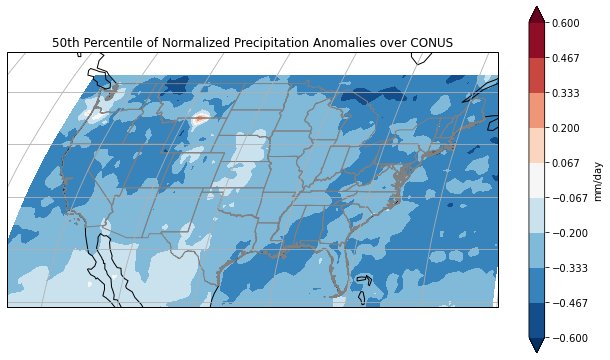

In [11]:
#specific year
fig = plt.figure(figsize=(11,8.5))
ax=plt.axes(projection=ccrs.Robinson())
clevs=np.linspace(-0.60,0.60,10)
cs=ax.contourf(precip_xarray['lon'], precip_xarray['lat'], precip_xarray[-1,:,:],clevs,transform = ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')
cbar=plt.colorbar(cs, shrink=0.75,label='mm/day')
plt.title('50th Percentile of Normalized Precipitation Anomalies over CONUS')

In [12]:
mean_50th=precip_xarray.mean(dim='time')
mean_50th

<xarray.DataArray (lat: 55, lon: 107)>
array([[-0.19288637, -0.18319222, -0.17275669, ..., -0.22457346,
        -0.25687427, -0.25575918],
       [-0.19465723, -0.17696453, -0.16805752, ..., -0.22284359,
        -0.23173936, -0.24588521],
       [-0.18163928, -0.1688878 , -0.16569074, ..., -0.2318649 ,
        -0.23116806, -0.23903866],
       ...,
       [-0.34243861, -0.33973165, -0.34270251, ..., -0.39104033,
        -0.40005412, -0.40490871],
       [-0.34267438, -0.34197978, -0.33896452, ..., -0.37710142,
        -0.39309922, -0.39348107],
       [-0.33305808, -0.31403729, -0.33185916, ..., -0.34598007,
        -0.3482883 , -0.3548004 ]])
Coordinates:
  * lat      (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.0 48.5 49.0 49.5 50.0
  * lon      (lon) float64 -126.9 -126.2 -125.6 -125.0 ... -61.88 -61.25 -60.62

Text(0.5, 1.0, 'Time-mean 50th Percentile of Normalized Precipitation Anomalies over CONUS')

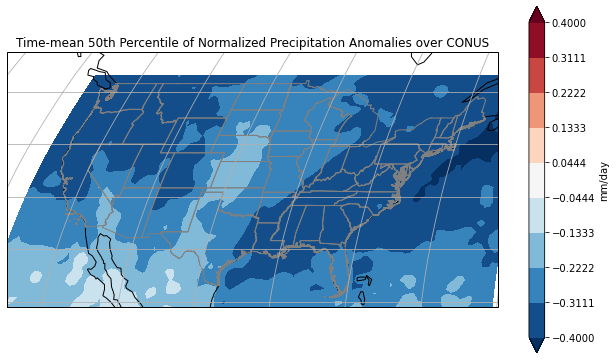

In [15]:
fig = plt.figure(figsize=(11,8.5))
ax=plt.axes(projection=ccrs.Robinson())
clevs=np.linspace(-0.40,0.40,10)

cs=ax.contourf(mean_50th['lon'], mean_50th['lat'], mean_50th,clevs,transform = ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')
cbar=plt.colorbar(cs, shrink=0.75,label='mm/day')
plt.title('Time-mean 50th Percentile of Normalized Precipitation Anomalies over CONUS')

In [16]:
#time-mean of median of yearly DJF standardized anomalies are skewed negative almost everywehere.

In [17]:
dc_50th_percentile=precip_xarray.sel(lat=39,lon=-77,method='nearest')
dc_50th_percentile

<xarray.DataArray (time: 42)>
array([-0.3553113 , -0.35982376, -0.31451587, -0.35314417, -0.32766077,
       -0.36779934, -0.31890595, -0.34641048, -0.34226638, -0.34683278,
       -0.29733469, -0.34558721, -0.31783161, -0.34156854, -0.34182622,
       -0.35133043, -0.25492108, -0.29996179, -0.27693519, -0.3374368 ,
       -0.36102507, -0.33438408, -0.36383262, -0.32641321, -0.3538993 ,
       -0.34288032, -0.35540423, -0.31959024, -0.35186937, -0.35666314,
       -0.34784897, -0.36811914, -0.34766683, -0.34419067, -0.30126852,
       -0.32156943, -0.32435346, -0.36217099, -0.34190728, -0.31959049,
       -0.32501087, -0.32035252])
Coordinates:
  * time     (time) int64 1980 1981 1982 1983 1984 ... 2017 2018 2019 2020 2021
    lat      float64 39.0
    lon      float64 -76.88

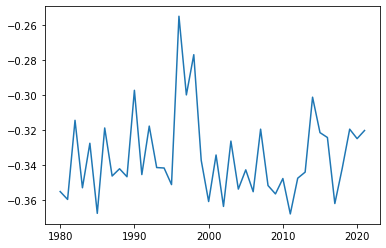

In [18]:
plt.plot(dc_50th_percentile['time'],dc_50th_percentile)

In [9]:

#Thiel-Sen
from scipy.stats import mstats
years=np.arange(0,42,1)
nlons=len(precip_xarray['lon'])
nlats=len(precip_xarray['lat'])
#p_array=np.zeros((nlats,nlons))
#r_array=np.zeros((nlats,nlons))
m_array=np.zeros((nlats,nlons))

for i in range(nlons):
    for j in range(nlats): 
        y=precip_xarray[:,j,i]
        slope_thiel, intercept_thiel, low_slope,high_slope=mstats.theilslopes(y, x=years, alpha=0.95)
        m_array[j,i]=slope_thiel


In [10]:
print(low_slope)
print(high_slope)

-0.001286411149935289
0.0010460183808678075


Text(0.5, 1.0, 'Thiel-sen Regression between time and 50th Percentile of Normalized Precipitation Anomalies over CONUS')

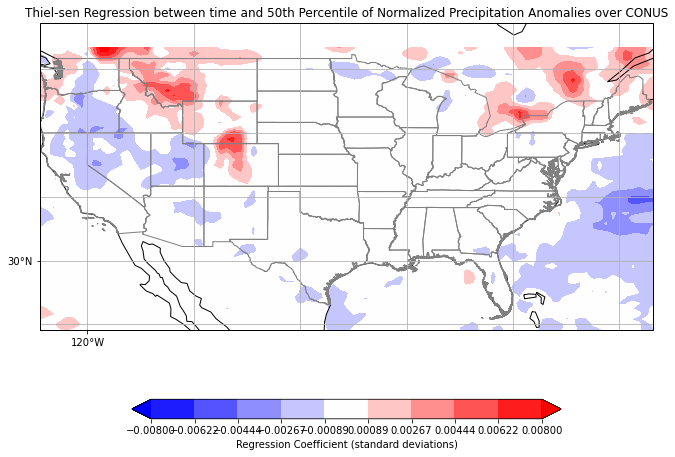

In [23]:
#clevs=np.arange(-1,1,0.1)
clevs=np.linspace(-0.008,0.008,10)


fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point
data=m_array
data,lon=add_cyclic_point(data,coord=precip_xarray['lon'])
#mask_data,lons=add_cyclic_point(mask_sig,coord=precip_xarray['lon'])

# Make a filled contour plot
cs=ax.contourf(lon,precip_xarray['lat'],
            data,clevs,
            transform=ccrs.PlateCarree(),
            cmap='bwr',extend='both')

#ax.contourf(lon,precip_xarray['lat'],mask_data,[0,1],
#            transform = ccrs.PlateCarree(),colors='None',
#            hatches=['.','.'],extend='both',alpha=0)
# Define the xticks for longtitude 
ax.set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define ytick for latitude
ax.set_yticks(np.arange(-90,91,30),crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')


# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Regression Coefficient (standard deviations)')

# Add title
plt.title('Thiel-sen Regression between time and 50th Percentile of Normalized Precipitation Anomalies over CONUS')



### Monthly time series

In [24]:
monthly_timeseries=[]
for i in range(1980,2022,1):
    #print(i)
    year_of_data = sorted_precip.sel(time = slice(str(i)+"-01-01",str(i)+"-12-31")).groupby('time.month')
    timeseries_50th=year_of_data.quantile(0.50,dim='time')
    monthly_timeseries.append(timeseries_50th)


In [25]:
monthly_ts=xr.concat(monthly_timeseries,dim='month')
monthly_ts

<xarray.DataArray 'PRECTOTCORR' (month: 125, lat: 55, lon: 107)>
array([[[-0.26382315, -0.22014387, -0.19401726, ..., -0.17930038,
         -0.20562533, -0.21600668],
        [-0.28432578, -0.26064637, -0.21481647, ..., -0.15385239,
         -0.17217489, -0.19275287],
        [-0.27970821, -0.26503277, -0.2333051 , ..., -0.14423761,
         -0.14332637, -0.16256912],
        ...,
        [-0.63763118, -0.59372228, -0.58244282, ..., -0.40132242,
         -0.44072965, -0.47241819],
        [-0.64970058, -0.65489721, -0.61484355, ..., -0.40503579,
         -0.44671157, -0.46132004],
        [-0.66832346, -0.62585533, -0.63783884, ..., -0.35164508,
         -0.34992963, -0.37378266]],

       [[-0.18348493, -0.18675214, -0.18494309, ..., -0.16421533,
         -0.21260633, -0.19685838],
        [-0.22517857, -0.1875181 , -0.17624763, ..., -0.13588312,
         -0.14039212, -0.18711951],
        [-0.22321476, -0.20099744, -0.17809014, ..., -0.11863261,
         -0.18842196, -0.16427727],
...
        [-0.452571  , -0.47093096, -0.38382849, ..., -0.48152366,
         -0.53259116, -0.55763406],
        [-0.45590717, -0.44216618, -0.38997567, ..., -0.44829217,
         -0.49039757, -0.51264817],
        [-0.50658375, -0.41889417, -0.44530439, ..., -0.40649399,
         -0.42525125, -0.44921908]],

       [[-0.17791673, -0.1661405 , -0.15429839, ..., -0.28194597,
         -0.32085045, -0.31846675],
        [-0.18964209, -0.16557297, -0.15567012, ..., -0.28513888,
         -0.30821331, -0.30859847],
        [-0.18202692, -0.16617526, -0.16434692, ..., -0.29856531,
         -0.29127738, -0.2975533 ],
        ...,
        [-0.45141612, -0.43122444, -0.41950582, ..., -0.40381449,
         -0.43910305, -0.48141631],
        [-0.38873841, -0.40790178, -0.43494704, ..., -0.41137074,
         -0.44271506, -0.45886047],
        [-0.29936682, -0.3775939 , -0.43082766, ..., -0.31685081,
         -0.33245797, -0.36535704]]])
Coordinates:
  * lon       (lon) float64 -126.9 -126.2 -125.6 -125.0 ... -61.88 -61.25 -60.62
  * lat       (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.5 49.0 49.5 50.0
    quantile  float64 0.5
  * month     (month) int64 1 2 12 1 2 12 1 2 12 1 2 ... 2 12 1 2 12 1 2 12 1 2

In [29]:
jan_ts=monthly_ts.sel(month=1)
jan_ts

<xarray.DataArray 'PRECTOTCORR' (month: 42, lat: 55, lon: 107)>
array([[[-0.26382315, -0.22014387, -0.19401726, ..., -0.17930038,
         -0.20562533, -0.21600668],
        [-0.28432578, -0.26064637, -0.21481647, ..., -0.15385239,
         -0.17217489, -0.19275287],
        [-0.27970821, -0.26503277, -0.2333051 , ..., -0.14423761,
         -0.14332637, -0.16256912],
        ...,
        [-0.63763118, -0.59372228, -0.58244282, ..., -0.40132242,
         -0.44072965, -0.47241819],
        [-0.64970058, -0.65489721, -0.61484355, ..., -0.40503579,
         -0.44671157, -0.46132004],
        [-0.66832346, -0.62585533, -0.63783884, ..., -0.35164508,
         -0.34992963, -0.37378266]],

       [[-0.26881373, -0.2232355 , -0.19223845, ...,  0.567294  ,
          0.13657923,  0.14797336],
        [-0.29653975, -0.21989118, -0.18790627, ...,  0.55973017,
          0.39488897,  0.36883622],
        [-0.26894206, -0.20105982, -0.18011834, ...,  0.55420446,
          0.63968641,  0.49496707],
...
        [ 0.33804914,  0.38187745,  0.42320362, ..., -0.41197112,
         -0.43979612, -0.45012176],
        [ 0.17441943,  0.29834372,  0.26222777, ..., -0.39521223,
         -0.42405024, -0.42866951],
        [ 0.17688255,  0.04432359,  0.13614474, ..., -0.41130826,
         -0.40132901, -0.41464618]],

       [[-0.27248827, -0.22014387, -0.19215339, ..., -0.26254186,
         -0.24226925, -0.25228062],
        [-0.29848573, -0.24031964, -0.21481647, ..., -0.22961448,
         -0.24134523, -0.26394647],
        [-0.26151332, -0.23812863, -0.22009332, ..., -0.23146373,
         -0.2331201 , -0.2417963 ],
        ...,
        [-0.452571  , -0.47093096, -0.38382849, ..., -0.48152366,
         -0.53259116, -0.55763406],
        [-0.45590717, -0.44216618, -0.38997567, ..., -0.44829217,
         -0.49039757, -0.51264817],
        [-0.50658375, -0.41889417, -0.44530439, ..., -0.40649399,
         -0.42525125, -0.44921908]]])
Coordinates:
  * lon       (lon) float64 -126.9 -126.2 -125.6 -125.0 ... -61.88 -61.25 -60.62
  * lat       (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.5 49.0 49.5 50.0
    quantile  float64 0.5
  * month     (month) int64 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1 1

In [30]:
feb_ts=monthly_ts.sel(month=2)
feb_ts

<xarray.DataArray 'PRECTOTCORR' (month: 42, lat: 55, lon: 107)>
array([[[-0.18348493, -0.18675214, -0.18494309, ..., -0.16421533,
         -0.21260633, -0.19685838],
        [-0.22517857, -0.1875181 , -0.17624763, ..., -0.13588312,
         -0.14039212, -0.18711951],
        [-0.22321476, -0.20099744, -0.17809014, ..., -0.11863261,
         -0.18842196, -0.16427727],
        ...,
        [-0.38606116, -0.37261683, -0.39232457, ..., -0.34208733,
         -0.34007171, -0.37489831],
        [-0.43032455, -0.42313617, -0.38719514, ..., -0.35673845,
         -0.33987501, -0.37239525],
        [-0.44386414, -0.43575358, -0.39031324, ..., -0.32749742,
         -0.33532548, -0.32125339]],

       [[-0.19785322, -0.18915397, -0.207628  , ...,  0.05726465,
         -0.00878855, -0.00192607],
        [-0.21566467, -0.19223736, -0.18067441, ...,  0.05873576,
          0.0201587 ,  0.00884722],
        [-0.2075056 , -0.19547704, -0.18361954, ..., -0.11278348,
         -0.03212422,  0.02885794],
...
        [-0.30842277, -0.31007573, -0.3689304 , ..., -0.4613905 ,
         -0.48035935, -0.5259192 ],
        [-0.23866114, -0.25198594, -0.34884581, ..., -0.40230274,
         -0.44927096, -0.45108518],
        [-0.17928872, -0.19757682, -0.4051224 , ..., -0.32313222,
         -0.3312906 , -0.31204835]],

       [[-0.17791673, -0.1661405 , -0.15429839, ..., -0.28194597,
         -0.32085045, -0.31846675],
        [-0.18964209, -0.16557297, -0.15567012, ..., -0.28513888,
         -0.30821331, -0.30859847],
        [-0.18202692, -0.16617526, -0.16434692, ..., -0.29856531,
         -0.29127738, -0.2975533 ],
        ...,
        [-0.45141612, -0.43122444, -0.41950582, ..., -0.40381449,
         -0.43910305, -0.48141631],
        [-0.38873841, -0.40790178, -0.43494704, ..., -0.41137074,
         -0.44271506, -0.45886047],
        [-0.29936682, -0.3775939 , -0.43082766, ..., -0.31685081,
         -0.33245797, -0.36535704]]])
Coordinates:
  * lon       (lon) float64 -126.9 -126.2 -125.6 -125.0 ... -61.88 -61.25 -60.62
  * lat       (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.5 49.0 49.5 50.0
    quantile  float64 0.5
  * month     (month) int64 2 2 2 2 2 2 2 2 2 2 2 2 ... 2 2 2 2 2 2 2 2 2 2 2 2

In [31]:
dec_ts=monthly_ts.sel(month=12)
dec_ts

<xarray.DataArray 'PRECTOTCORR' (month: 41, lat: 55, lon: 107)>
array([[[-0.25160468, -0.2667695 , -0.29365993, ...,  0.12120668,
         -0.01505294,  0.02828494],
        [-0.23788553, -0.25675628, -0.26525217, ...,  0.22144343,
          0.12514563,  0.03178554],
        [-0.22934034, -0.22824109, -0.25540355, ...,  0.34140649,
          0.20772618,  0.13932593],
        ...,
        [-0.29355025, -0.09739422, -0.0913265 , ..., -0.29505917,
         -0.32598037, -0.25517479],
        [-0.26805928, -0.22685558, -0.00173916, ..., -0.30040869,
         -0.41941968, -0.3429729 ],
        [-0.38750565, -0.34832695, -0.20322724, ..., -0.33561087,
         -0.3599501 , -0.33089584]],

       [[-0.20528705, -0.2082877 , -0.20145293, ..., -0.1831639 ,
         -0.25275767, -0.2400433 ],
        [-0.20984444, -0.21106131, -0.19967015, ..., -0.23725976,
         -0.2870526 , -0.34052354],
        [-0.14344776, -0.16297816, -0.20934328, ..., -0.29039872,
         -0.33052233, -0.34880078],
...
        [-0.22949831, -0.24498306, -0.18908036, ..., -0.48713523,
         -0.4768613 , -0.49732298],
        [-0.12063854, -0.06971985, -0.17465453, ..., -0.49852318,
         -0.49804211, -0.47439891],
        [-0.14702626, -0.0029339 , -0.29793525, ..., -0.45163929,
         -0.45850658, -0.44023916]],

       [[-0.23864746, -0.27810138, -0.27274278, ..., -0.21102551,
         -0.28917819, -0.27634147],
        [-0.21693996, -0.25322774, -0.26810321, ..., -0.23691523,
         -0.22655918, -0.24587433],
        [-0.19458972, -0.20232241, -0.24943368, ..., -0.26303226,
         -0.26899105, -0.24700268],
        ...,
        [-0.46567541, -0.50886482, -0.32361493, ..., -0.49811515,
         -0.50269389, -0.52766526],
        [-0.50374222, -0.4872463 , -0.3225486 , ..., -0.47113267,
         -0.5184446 , -0.491501  ],
        [-0.47877944, -0.58081961, -0.49078384, ..., -0.41464064,
         -0.43092403, -0.42291185]]])
Coordinates:
  * lon       (lon) float64 -126.9 -126.2 -125.6 -125.0 ... -61.88 -61.25 -60.62
  * lat       (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.5 49.0 49.5 50.0
    quantile  float64 0.5
  * month     (month) int64 12 12 12 12 12 12 12 12 ... 12 12 12 12 12 12 12 12

In [32]:
from scipy.stats import mstats
months=np.arange(0,42,1)
nlons=len(jan_ts['lon'])
nlats=len(jan_ts['lat'])
#p_array=np.zeros((nlats,nlons))
#r_array=np.zeros((nlats,nlons))
m_array=np.zeros((nlats,nlons))

for i in range(nlons):
    for j in range(nlats): 
        y=jan_ts[:,j,i]
        slope_thiel, intercept_thiel, low_slope,high_slope=mstats.theilslopes(y, x=months, alpha=0.95)
        #m,b,r,p,e = linregress(months,y)
        m_array[j,i]=slope_thiel
        #r_array[j,i]=r
        #p_array[j,i]=p

Text(0.5, 1.0, 'Thiel-sen Regression between time and 50th Percentile of Janurary Normalized Precipitation Anomalies over CONUS from 1980-2021')

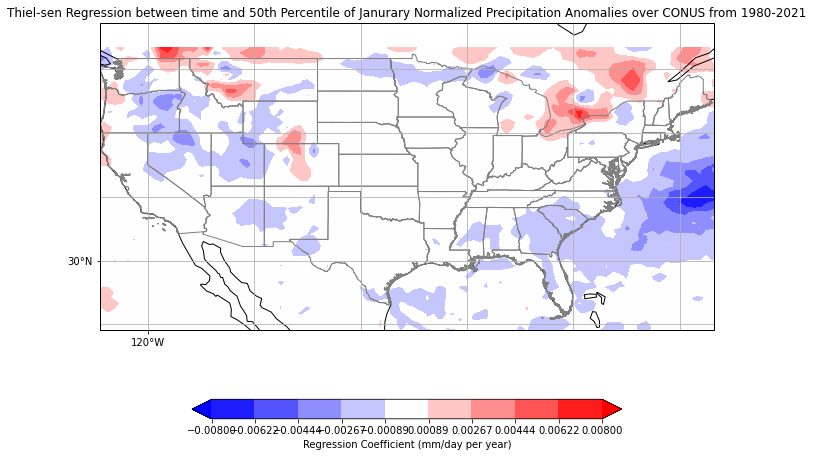

In [34]:
#clevs=np.arange(-0.2,0.2,0.025)
clevs=np.linspace(-0.008,0.008,10)


fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point
data=m_array
data,lon=add_cyclic_point(data,coord=jan_ts['lon'])
#mask_data,lons=add_cyclic_point(mask_sig,coord=jan_ts['lon'])

# Make a filled contour plot
cs=ax.contourf(lon,jan_ts['lat'],
            data,clevs,
            transform=ccrs.PlateCarree(),
            cmap='bwr',extend='both')

#ax.contourf(lon,jan_ts['lat'],mask_data,[0,1],
 #           transform = ccrs.PlateCarree(),colors='None',
  #          hatches=['.','.'],extend='both',alpha=0)
# Define the xticks for longtitude 
ax.set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define ytick for latitude
ax.set_yticks(np.arange(-90,91,30),crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')


# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Regression Coefficient (mm/day per year)')

# Add title
plt.title('Thiel-sen Regression between time and 50th Percentile of Janurary Normalized Precipitation Anomalies over CONUS from 1980-2021')
#plt.savefig('/homes/areed29/CLIM997/summer2

In [35]:
months=np.arange(0,42,1)
nlons=len(feb_ts['lon'])
nlats=len(feb_ts['lat'])
#p_array=np.zeros((nlats,nlons))
#r_array=np.zeros((nlats,nlons))
m_array_2=np.zeros((nlats,nlons))

for i in range(nlons):
    for j in range(nlats): 
        y=feb_ts[:,j,i]
        slope_thiel, intercept_thiel, low_slope,high_slope=mstats.theilslopes(y, x=months, alpha=0.95)
        #m,b,r,p,e = linregress(months,y)
        m_array_2[j,i]=slope_thiel
        #r_array[j,i]=r
        #p_array[j,i]=p






Text(0.5, 1.0, 'Thiel-sen Regression between time and 50th Percentile of Feburary Normalized Precipitation Anomalies over CONUS from 1980-2021')

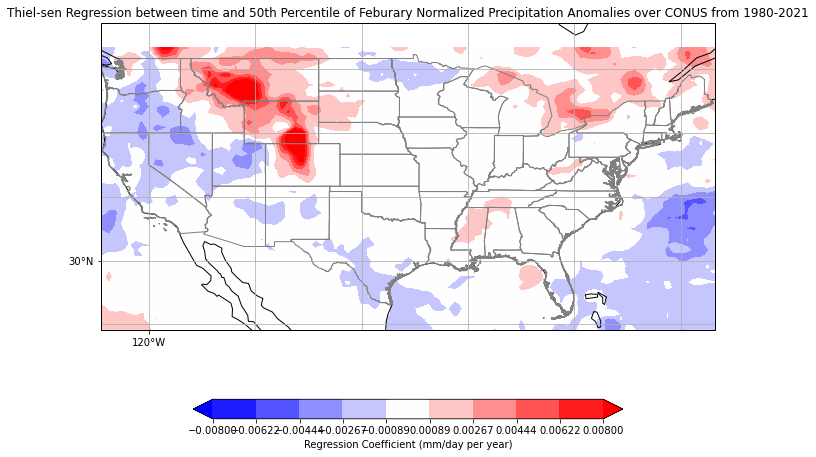

In [36]:
clevs=np.linspace(-0.008,0.008,10)


fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point
data=m_array_2
data,lon=add_cyclic_point(data,coord=feb_ts['lon'])
#mask_data,lons=add_cyclic_point(mask_sig,coord=jan_ts['lon'])

# Make a filled contour plot
cs=ax.contourf(lon,feb_ts['lat'],
            data,clevs,
            transform=ccrs.PlateCarree(),
            cmap='bwr',extend='both')

#ax.contourf(lon,jan_ts['lat'],mask_data,[0,1],
 #           transform = ccrs.PlateCarree(),colors='None',
  #          hatches=['.','.'],extend='both',alpha=0)
# Define the xticks for longtitude 
ax.set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define ytick for latitude
ax.set_yticks(np.arange(-90,91,30),crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')


# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Regression Coefficient (mm/day per year)')

# Add title
plt.title('Thiel-sen Regression between time and 50th Percentile of Feburary Normalized Precipitation Anomalies over CONUS from 1980-2021')
#plt.savefig('/homes/areed29/CLIM997/summer22_research/feb95th_thielsen.png')



In [37]:
months=np.arange(0,41,1)
nlons=len(dec_ts['lon'])
nlats=len(dec_ts['lat'])
#p_array=np.zeros((nlats,nlons))
#r_array=np.zeros((nlats,nlons))
m_array_12=np.zeros((nlats,nlons))

for i in range(nlons):
    for j in range(nlats): 
        y=dec_ts[:,j,i]
        slope_thiel, intercept_thiel, low_slope,high_slope=mstats.theilslopes(y, x=months, alpha=0.95)
        #m,b,r,p,e = linregress(months,y)
        m_array_12[j,i]=slope_thiel
        #r_array[j,i]=r
        #p_array[j,i]=p



Text(0.5, 1.0, 'Thiel-sen Regression between time and 50th Percentile of December Normalized Precipitation Anomalies over CONUS from 1980-2021')

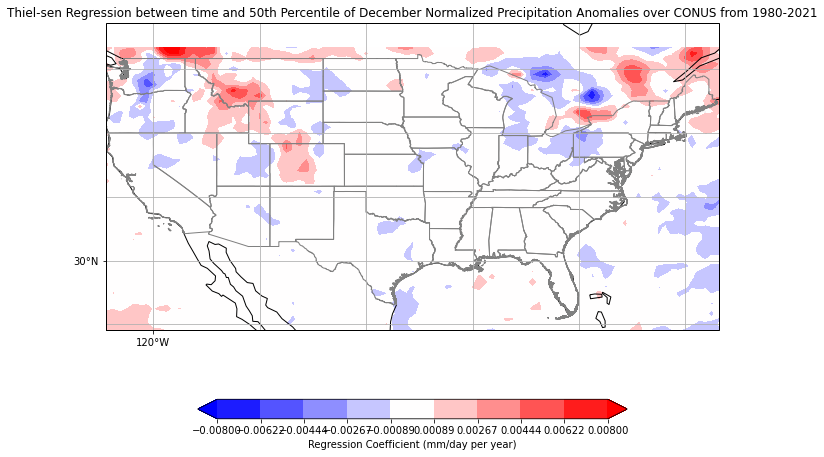

In [38]:
clevs=np.linspace(-0.008,0.008,10)

fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point
data=m_array_12
data,lon=add_cyclic_point(data,coord=dec_ts['lon'])
#mask_data,lons=add_cyclic_point(mask_sig,coord=jan_ts['lon'])

# Make a filled contour plot
cs=ax.contourf(lon,dec_ts['lat'],
            data,clevs,
            transform=ccrs.PlateCarree(),
            cmap='bwr',extend='both')

#ax.contourf(lon,jan_ts['lat'],mask_data,[0,1],
 #           transform = ccrs.PlateCarree(),colors='None',
  #          hatches=['.','.'],extend='both',alpha=0)
# Define the xticks for longtitude 
ax.set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define ytick for latitude
ax.set_yticks(np.arange(-90,91,30),crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')


# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Regression Coefficient (mm/day per year)')

# Add title
plt.title('Thiel-sen Regression between time and 50th Percentile of December Normalized Precipitation Anomalies over CONUS from 1980-2021')
#plt.savefig('/homes/areed29/CLIM997/summer22_research/dec95th_thielsen.png')




### Exploring Droughts (10th Percentile)

In [5]:
all_10th_vals=[]
for i in range(1980,2022,1):
    year_of_data = sorted_precip.sel(time = slice(str(i)+"-01-01",str(i)+"-12-31"))
    conus_10th_precip_anoms=year_of_data.quantile(0.10,dim='time')
    all_10th_vals.append(conus_10th_precip_anoms)
    #print(conus_95th_precip_anoms)

In [6]:
time_array=np.arange(1980,2022,1)
time_array

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

In [7]:
droughts_xarray=xr.DataArray(all_10th_vals,coords={'time': time_array,'lat':sorted_precip['lat'],'lon':sorted_precip['lon']},dims=['time','lat','lon'])
droughts_xarray

<xarray.DataArray (time: 42, lat: 55, lon: 107)>
array([[[-0.38805321, -0.41071886, -0.40784734, ..., -0.36591086,
         -0.43227413, -0.43557158],
        [-0.42022291, -0.42332935, -0.40703765, ..., -0.34508571,
         -0.38362148, -0.38557386],
        [-0.41338795, -0.42164776, -0.41903338, ..., -0.39373827,
         -0.38476741, -0.39679986],
        ...,
        [-0.84025347, -0.82723796, -0.82648498, ..., -0.61821276,
         -0.65265834, -0.66800469],
        [-0.82559544, -0.81342298, -0.82873338, ..., -0.59024847,
         -0.62757182, -0.63590527],
        [-0.8652705 , -0.88446009, -0.83591628, ..., -0.52298576,
         -0.55831474, -0.58281332]],

       [[-0.41808793, -0.40340432, -0.38551641, ..., -0.3509786 ,
         -0.39740182, -0.39625203],
        [-0.43753058, -0.4240633 , -0.39178741, ..., -0.36103802,
         -0.36969673, -0.4036955 ],
        [-0.42232559, -0.42472703, -0.41927633, ..., -0.40449748,
         -0.42979599, -0.41737835],
...
        [-0.74655986, -0.70233893, -0.7065568 , ..., -0.63216901,
         -0.69870561, -0.73102754],
        [-0.69717866, -0.69817233, -0.72408074, ..., -0.61501396,
         -0.66307378, -0.69274986],
        [-0.74058264, -0.7595346 , -0.76172012, ..., -0.55041713,
         -0.56233627, -0.60453576]],

       [[-0.45462011, -0.42396052, -0.35733206, ..., -0.48624641,
         -0.48939556, -0.49239834],
        [-0.4974364 , -0.47345586, -0.42858847, ..., -0.4832273 ,
         -0.43298024, -0.46505988],
        [-0.47431294, -0.4755658 , -0.45834618, ..., -0.50058355,
         -0.43711137, -0.43138107],
        ...,
        [-0.76538608, -0.75607251, -0.73244796, ..., -0.59701053,
         -0.64002235, -0.65906587],
        [-0.74075702, -0.72821742, -0.73504293, ..., -0.56087252,
         -0.6238099 , -0.64059895],
        [-0.72571584, -0.75394526, -0.76267968, ..., -0.49995797,
         -0.52887678, -0.5585178 ]]])
Coordinates:
  * time     (time) int64 1980 1981 1982 1983 1984 ... 2017 2018 2019 2020 2021
  * lat      (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.0 48.5 49.0 49.5 50.0
  * lon      (lon) float64 -126.9 -126.2 -125.6 -125.0 ... -61.88 -61.25 -60.62

Text(0.5, 1.0, '10th Percentile of Normalized Precipitation Anomalies over CONUS (Droughts)')

/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


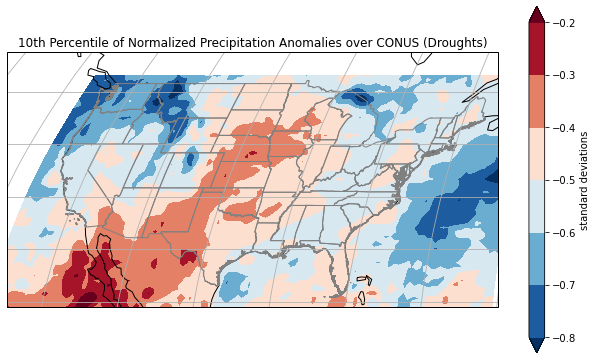

In [8]:
#specific year
fig = plt.figure(figsize=(11,8.5))
ax=plt.axes(projection=ccrs.Robinson())
#clevs=np.linspace(-0.60,0.60,10)
cs=ax.contourf(droughts_xarray['lon'], droughts_xarray['lat'], droughts_xarray[-1,:,:],transform = ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')
cbar=plt.colorbar(cs, shrink=0.75,label='standard deviations')
plt.title('10th Percentile of Normalized Precipitation Anomalies over CONUS (Droughts)')

In [9]:
mean_10th=droughts_xarray.mean(dim='time')
mean_10th

<xarray.DataArray (lat: 55, lon: 107)>
array([[-0.39240319, -0.40103064, -0.38302522, ..., -0.46866454,
        -0.52116971, -0.52442257],
       [-0.41425594, -0.40354392, -0.39029107, ..., -0.46448877,
        -0.48546869, -0.51259578],
       [-0.4035633 , -0.39560565, -0.39731035, ..., -0.48287787,
        -0.47804273, -0.49645286],
       ...,
       [-0.79858052, -0.77888271, -0.78056562, ..., -0.63758254,
        -0.66860505, -0.68417715],
       [-0.78937068, -0.78072682, -0.80447298, ..., -0.60189251,
        -0.64782443, -0.66200649],
       [-0.81681313, -0.82948772, -0.80764685, ..., -0.55112333,
        -0.56616099, -0.58338   ]])
Coordinates:
  * lat      (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.0 48.5 49.0 49.5 50.0
  * lon      (lon) float64 -126.9 -126.2 -125.6 -125.0 ... -61.88 -61.25 -60.62

Text(0.5, 1.0, 'Time-mean 10th Percentile of Normalized Precipitation Anomalies over CONUS')

/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


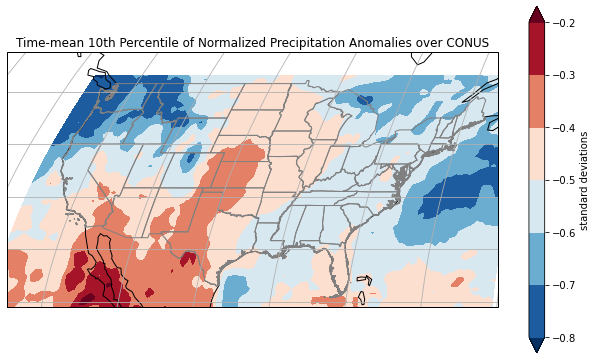

In [10]:
fig = plt.figure(figsize=(11,8.5))
ax=plt.axes(projection=ccrs.Robinson())
#clevs=np.linspace(-0.40,0.40,10)

cs=ax.contourf(mean_10th['lon'], mean_10th['lat'], mean_10th,transform = ccrs.PlateCarree(),cmap='RdBu_r',extend='both')
ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')
cbar=plt.colorbar(cs, shrink=0.75,label='standard deviations')
plt.title('Time-mean 10th Percentile of Normalized Precipitation Anomalies over CONUS')

In [11]:
dc_10th_percentile=droughts_xarray.sel(lat=39,lon=-77,method='nearest')
dc_10th_percentile

<xarray.DataArray (time: 42)>
array([-0.54790932, -0.52690749, -0.52308019, -0.53295992, -0.52282631,
       -0.53054945, -0.4821579 , -0.51089989, -0.52883422, -0.5118893 ,
       -0.51102021, -0.54793388, -0.51809412, -0.52631184, -0.51558961,
       -0.51646307, -0.50047982, -0.53206552, -0.51689314, -0.53087243,
       -0.51732284, -0.51127905, -0.52919302, -0.52237332, -0.53248781,
       -0.51908947, -0.52962343, -0.54532911, -0.51100421, -0.55016019,
       -0.52962326, -0.56719778, -0.51501352, -0.51579529, -0.53395659,
       -0.5480659 , -0.53141624, -0.55580852, -0.52302179, -0.51113495,
       -0.52093816, -0.50640185])
Coordinates:
  * time     (time) int64 1980 1981 1982 1983 1984 ... 2017 2018 2019 2020 2021
    lat      float64 39.0
    lon      float64 -76.88

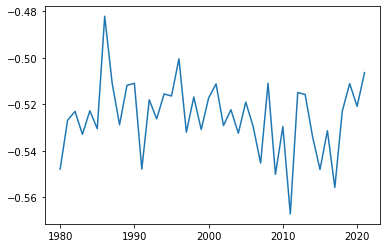

In [13]:
plt.plot(dc_10th_percentile['time'],dc_10th_percentile)

In [14]:
#Thiel-Sen
from scipy.stats import mstats
years=np.arange(0,42,1)
nlons=len(droughts_xarray['lon'])
nlats=len(droughts_xarray['lat'])
#p_array=np.zeros((nlats,nlons))
#r_array=np.zeros((nlats,nlons))
m_array=np.zeros((nlats,nlons))

for i in range(nlons):
    for j in range(nlats): 
        y=droughts_xarray[:,j,i]
        slope_thiel, intercept_thiel, low_slope,high_slope=mstats.theilslopes(y, x=years, alpha=0.95)
        m_array[j,i]=slope_thiel



Text(0.5, 1.0, 'Thiel-sen Regression between time and 10th Percentile of Normalized Precipitation Anomalies over CONUS')

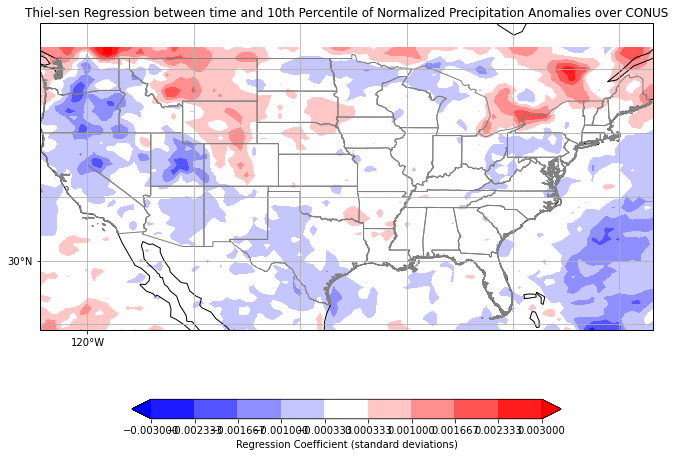

In [16]:
#clevs=np.arange(-1,1,0.1)
clevs=np.linspace(-0.003,0.003,10)


fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point
data=m_array
data,lon=add_cyclic_point(data,coord=droughts_xarray['lon'])
#mask_data,lons=add_cyclic_point(mask_sig,coord=precip_xarray['lon'])

# Make a filled contour plot
cs=ax.contourf(lon,droughts_xarray['lat'],
            data,clevs,
            transform=ccrs.PlateCarree(),
            cmap='bwr',extend='both')

#ax.contourf(lon,precip_xarray['lat'],mask_data,[0,1],
#            transform = ccrs.PlateCarree(),colors='None',
#            hatches=['.','.'],extend='both',alpha=0)
# Define the xticks for longtitude 
ax.set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define ytick for latitude
ax.set_yticks(np.arange(-90,91,30),crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')


# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Regression Coefficient (standard deviations)')

# Add title
plt.title('Thiel-sen Regression between time and 10th Percentile of Normalized Precipitation Anomalies over CONUS')




In [17]:

monthly_timeseries=[]
for i in range(1980,2022,1):
    #print(i)
    year_of_data = sorted_precip.sel(time = slice(str(i)+"-01-01",str(i)+"-12-31")).groupby('time.month')
    timeseries_10th=year_of_data.quantile(0.10,dim='time')
    monthly_timeseries.append(timeseries_10th)


In [18]:
monthly_ts=xr.concat(monthly_timeseries,dim='month')
monthly_ts

<xarray.DataArray 'PRECTOTCORR' (month: 125, lat: 55, lon: 107)>
array([[[-0.39424062, -0.40205961, -0.3851741 , ..., -0.36591086,
         -0.43227413, -0.45794559],
        [-0.41838959, -0.39358577, -0.40703765, ..., -0.32364872,
         -0.34376568, -0.35344607],
        [-0.41338795, -0.41150123, -0.40932998, ..., -0.31852731,
         -0.37877828, -0.36904863],
        ...,
        [-0.87295359, -0.85277969, -0.87291586, ..., -0.6608569 ,
         -0.70088887, -0.6869877 ],
        [-0.87354505, -0.86635661, -0.87355638, ..., -0.62337875,
         -0.66120315, -0.68088359],
        [-0.89810961, -0.899867  , -0.83591628, ..., -0.54115504,
         -0.55831474, -0.58630586]],

       [[-0.39492517, -0.38265588, -0.34980106, ..., -0.36313748,
         -0.38780012, -0.38199005],
        [-0.4487717 , -0.3808264 , -0.36242564, ..., -0.30594188,
         -0.35434012, -0.35612002],
        [-0.52432623, -0.44711825, -0.36878135, ..., -0.30921771,
         -0.27996333, -0.29377661],
...
        [-0.79443902, -0.80337501, -0.78363925, ..., -0.63776302,
         -0.66545349, -0.67481691],
        [-0.80645353, -0.79267687, -0.80255061, ..., -0.59072477,
         -0.66204786, -0.69819927],
        [-0.84263933, -0.81611943, -0.80074966, ..., -0.53122085,
         -0.54638445, -0.57780474]],

       [[-0.37295595, -0.36304051, -0.319727  , ..., -0.38629458,
         -0.4105758 , -0.42297915],
        [-0.45335759, -0.39846447, -0.36366111, ..., -0.38998396,
         -0.38247718, -0.39451577],
        [-0.49165203, -0.45653661, -0.39748532, ..., -0.39202007,
         -0.39257569, -0.39142264],
        ...,
        [-0.5897875 , -0.61263524, -0.61265213, ..., -0.53732271,
         -0.55635883, -0.59285561],
        [-0.61069421, -0.62524946, -0.63908637, ..., -0.50779936,
         -0.5429036 , -0.55480292],
        [-0.61255823, -0.66752657, -0.62403174, ..., -0.44337717,
         -0.47025129, -0.49747859]]])
Coordinates:
  * lon       (lon) float64 -126.9 -126.2 -125.6 -125.0 ... -61.88 -61.25 -60.62
  * lat       (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.5 49.0 49.5 50.0
    quantile  float64 0.1
  * month     (month) int64 1 2 12 1 2 12 1 2 12 1 2 ... 2 12 1 2 12 1 2 12 1 2

In [19]:
jan_ts_droughts=monthly_ts.sel(month=1)
jan_ts_droughts

<xarray.DataArray 'PRECTOTCORR' (month: 42, lat: 55, lon: 107)>
array([[[-0.39424062, -0.40205961, -0.3851741 , ..., -0.36591086,
         -0.43227413, -0.45794559],
        [-0.41838959, -0.39358577, -0.40703765, ..., -0.32364872,
         -0.34376568, -0.35344607],
        [-0.41338795, -0.41150123, -0.40932998, ..., -0.31852731,
         -0.37877828, -0.36904863],
        ...,
        [-0.87295359, -0.85277969, -0.87291586, ..., -0.6608569 ,
         -0.70088887, -0.6869877 ],
        [-0.87354505, -0.86635661, -0.87355638, ..., -0.62337875,
         -0.66120315, -0.68088359],
        [-0.89810961, -0.899867  , -0.83591628, ..., -0.54115504,
         -0.55831474, -0.58630586]],

       [[-0.39268965, -0.39180359, -0.37062111, ..., -0.19533287,
         -0.24214469, -0.25408703],
        [-0.41668141, -0.37951389, -0.38414922, ..., -0.25659615,
         -0.20622043, -0.21558355],
        [-0.3744455 , -0.34545276, -0.37667319, ..., -0.29265052,
         -0.29416293, -0.31654549],
...
        [-0.69713402, -0.68573427, -0.6994639 , ..., -0.63216901,
         -0.69474888, -0.73838449],
        [-0.68544716, -0.68304551, -0.71725744, ..., -0.5930267 ,
         -0.66307378, -0.69274986],
        [-0.73021573, -0.68396187, -0.60185456, ..., -0.5397259 ,
         -0.56099188, -0.59362346]],

       [[-0.52158284, -0.46863875, -0.45877534, ..., -0.56533194,
         -0.54596472, -0.54441464],
        [-0.50334096, -0.47902241, -0.44169226, ..., -0.59801984,
         -0.57033879, -0.56774658],
        [-0.45822436, -0.47465014, -0.475541  , ..., -0.62253034,
         -0.62259597, -0.58255547],
        ...,
        [-0.79443902, -0.80337501, -0.78363925, ..., -0.63776302,
         -0.66545349, -0.67481691],
        [-0.80645353, -0.79267687, -0.80255061, ..., -0.59072477,
         -0.66204786, -0.69819927],
        [-0.84263933, -0.81611943, -0.80074966, ..., -0.53122085,
         -0.54638445, -0.57780474]]])
Coordinates:
  * lon       (lon) float64 -126.9 -126.2 -125.6 -125.0 ... -61.88 -61.25 -60.62
  * lat       (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.5 49.0 49.5 50.0
    quantile  float64 0.1
  * month     (month) int64 1 1 1 1 1 1 1 1 1 1 1 1 ... 1 1 1 1 1 1 1 1 1 1 1 1

In [20]:
feb_ts_droughts=monthly_ts.sel(month=2)
feb_ts_droughts

<xarray.DataArray 'PRECTOTCORR' (month: 42, lat: 55, lon: 107)>
array([[[-0.39492517, -0.38265588, -0.34980106, ..., -0.36313748,
         -0.38780012, -0.38199005],
        [-0.4487717 , -0.3808264 , -0.36242564, ..., -0.30594188,
         -0.35434012, -0.35612002],
        [-0.52432623, -0.44711825, -0.36878135, ..., -0.30921771,
         -0.27996333, -0.29377661],
        ...,
        [-0.66368574, -0.6792305 , -0.68566626, ..., -0.51644338,
         -0.56372539, -0.62450451],
        [-0.67311496, -0.67432746, -0.69922539, ..., -0.50018167,
         -0.52803242, -0.53391994],
        [-0.71476275, -0.75025831, -0.70511626, ..., -0.4362182 ,
         -0.49902195, -0.52300477]],

       [[-0.43271414, -0.39351874, -0.34833581, ..., -0.33256429,
         -0.36776669, -0.37303912],
        [-0.51236951, -0.49817939, -0.39589466, ..., -0.32476444,
         -0.33226678, -0.34993898],
        [-0.53415183, -0.52583756, -0.48753124, ..., -0.31483817,
         -0.31418279, -0.32036591],
...
        [-0.58091578, -0.59150418, -0.6397736 , ..., -0.57306389,
         -0.6053466 , -0.63786845],
        [-0.52626373, -0.53143436, -0.63198113, ..., -0.53979344,
         -0.61008551, -0.63615999],
        [-0.56252828, -0.52106653, -0.60984055, ..., -0.47367612,
         -0.49855798, -0.53544841]],

       [[-0.37295595, -0.36304051, -0.319727  , ..., -0.38629458,
         -0.4105758 , -0.42297915],
        [-0.45335759, -0.39846447, -0.36366111, ..., -0.38998396,
         -0.38247718, -0.39451577],
        [-0.49165203, -0.45653661, -0.39748532, ..., -0.39202007,
         -0.39257569, -0.39142264],
        ...,
        [-0.5897875 , -0.61263524, -0.61265213, ..., -0.53732271,
         -0.55635883, -0.59285561],
        [-0.61069421, -0.62524946, -0.63908637, ..., -0.50779936,
         -0.5429036 , -0.55480292],
        [-0.61255823, -0.66752657, -0.62403174, ..., -0.44337717,
         -0.47025129, -0.49747859]]])
Coordinates:
  * lon       (lon) float64 -126.9 -126.2 -125.6 -125.0 ... -61.88 -61.25 -60.62
  * lat       (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.5 49.0 49.5 50.0
    quantile  float64 0.1
  * month     (month) int64 2 2 2 2 2 2 2 2 2 2 2 2 ... 2 2 2 2 2 2 2 2 2 2 2 2

In [21]:
dec_ts_droughts=monthly_ts.sel(month=12)
dec_ts_droughts

<xarray.DataArray 'PRECTOTCORR' (month: 41, lat: 55, lon: 107)>
array([[[-0.3623752 , -0.41479391, -0.4224312 , ..., -0.33080852,
         -0.45115408, -0.43557158],
        [-0.39432734, -0.42332935, -0.43019298, ..., -0.34508571,
         -0.39073387, -0.38557386],
        [-0.40399802, -0.42164776, -0.41903338, ..., -0.46469826,
         -0.40403658, -0.41147888],
        ...,
        [-0.84318405, -0.82723796, -0.80055469, ..., -0.59154922,
         -0.64741218, -0.64784235],
        [-0.81408274, -0.8059777 , -0.81757987, ..., -0.57392782,
         -0.62757182, -0.61861545],
        [-0.8409164 , -0.8549813 , -0.84106898, ..., -0.63498473,
         -0.64580888, -0.59373778]],

       [[-0.34881642, -0.40585577, -0.39095482, ..., -0.40569773,
         -0.46958375, -0.46892029],
        [-0.39163244, -0.41420645, -0.40509543, ..., -0.43294331,
         -0.44639158, -0.45361882],
        [-0.41185012, -0.41730392, -0.39770752, ..., -0.47510251,
         -0.45454088, -0.45991659],
...
        [-0.74867547, -0.6808998 , -0.69572091, ..., -0.68718302,
         -0.71986192, -0.76378357],
        [-0.72295213, -0.66567045, -0.75753874, ..., -0.69485044,
         -0.71290195, -0.71822637],
        [-0.72931677, -0.75119138, -0.76816201, ..., -0.65821773,
         -0.64350605, -0.65339601]],

       [[-0.38816866, -0.43337741, -0.44669181, ..., -0.48977202,
         -0.57686102, -0.53765452],
        [-0.36836472, -0.39222324, -0.39561659, ..., -0.49231032,
         -0.50329214, -0.54689997],
        [-0.28699642, -0.3297905 , -0.38250768, ..., -0.45166999,
         -0.47043687, -0.49836755],
        ...,
        [-0.8384589 , -0.79512888, -0.77236938, ..., -0.68792117,
         -0.73595172, -0.75453961],
        [-0.76762456, -0.75896168, -0.77633739, ..., -0.64956617,
         -0.69731832, -0.72807842],
        [-0.81260324, -0.82085961, -0.82903403, ..., -0.62865782,
         -0.61815232, -0.64421296]]])
Coordinates:
  * lon       (lon) float64 -126.9 -126.2 -125.6 -125.0 ... -61.88 -61.25 -60.62
  * lat       (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.5 49.0 49.5 50.0
    quantile  float64 0.1
  * month     (month) int64 12 12 12 12 12 12 12 12 ... 12 12 12 12 12 12 12 12

In [25]:
from scipy.stats import mstats
months=np.arange(0,42,1)
nlons=len(jan_ts_droughts['lon'])
nlats=len(jan_ts_droughts['lat'])
#p_array=np.zeros((nlats,nlons))
#r_array=np.zeros((nlats,nlons))
m_array_jan=np.zeros((nlats,nlons))

for i in range(nlons):
    for j in range(nlats): 
        y=jan_ts_droughts[:,j,i]
        slope_thiel, intercept_thiel, low_slope,high_slope=mstats.theilslopes(y, x=months, alpha=0.95)
        #m,b,r,p,e = linregress(months,y)
        m_array_jan[j,i]=slope_thiel
        #r_array[j,i]=r
        #p_array[j,i]=p

Text(0.5, 1.0, 'Thiel-sen Regression between time and 10th Percentile of Janurary Normalized Precipitation Anomalies over CONUS from 1980-2021')

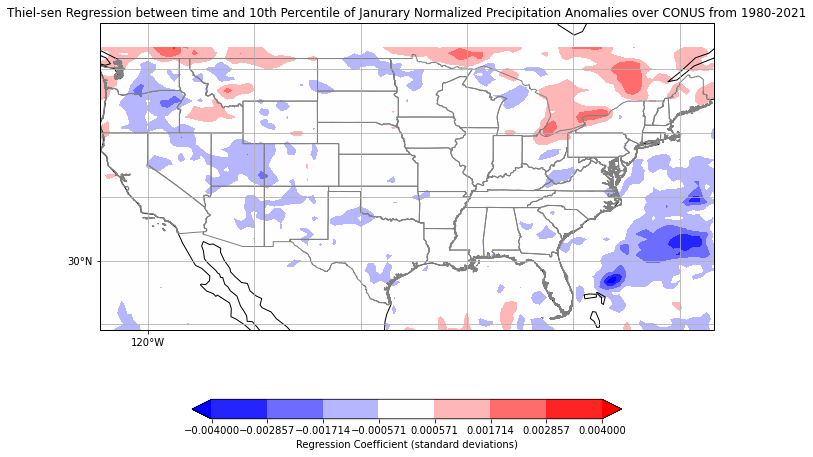

In [27]:
#clevs=np.arange(-0.2,0.2,0.025)
clevs=np.linspace(-0.004,0.004,8)


fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point
data=m_array_jan
data,lon=add_cyclic_point(data,coord=jan_ts_droughts['lon'])
#mask_data,lons=add_cyclic_point(mask_sig,coord=jan_ts['lon'])

# Make a filled contour plot
cs=ax.contourf(lon,jan_ts_droughts['lat'],
            data,clevs,
            transform=ccrs.PlateCarree(),
            cmap='bwr',extend='both')

#ax.contourf(lon,jan_ts['lat'],mask_data,[0,1],
 #           transform = ccrs.PlateCarree(),colors='None',
  #          hatches=['.','.'],extend='both',alpha=0)
# Define the xticks for longtitude 
ax.set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define ytick for latitude
ax.set_yticks(np.arange(-90,91,30),crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')


# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Regression Coefficient (standard deviations)')

# Add title
plt.title('Thiel-sen Regression between time and 10th Percentile of Janurary Normalized Precipitation Anomalies over CONUS from 1980-2021')
#plt.savefig('/homes/areed29/CLIM997/summer2


In [28]:
months=np.arange(0,42,1)
nlons=len(feb_ts_droughts['lon'])
nlats=len(feb_ts_droughts['lat'])
#p_array=np.zeros((nlats,nlons))
#r_array=np.zeros((nlats,nlons))
m_array_2=np.zeros((nlats,nlons))

for i in range(nlons):
    for j in range(nlats): 
        y=feb_ts_droughts[:,j,i]
        slope_thiel, intercept_thiel, low_slope,high_slope=mstats.theilslopes(y, x=months, alpha=0.95)
        #m,b,r,p,e = linregress(months,y)
        m_array_2[j,i]=slope_thiel
        #r_array[j,i]=r
        #p_array[j,i]=p




Text(0.5, 1.0, 'Thiel-sen Regression between time and 10th Percentile of Feburary Normalized Precipitation Anomalies over CONUS from 1980-2021')

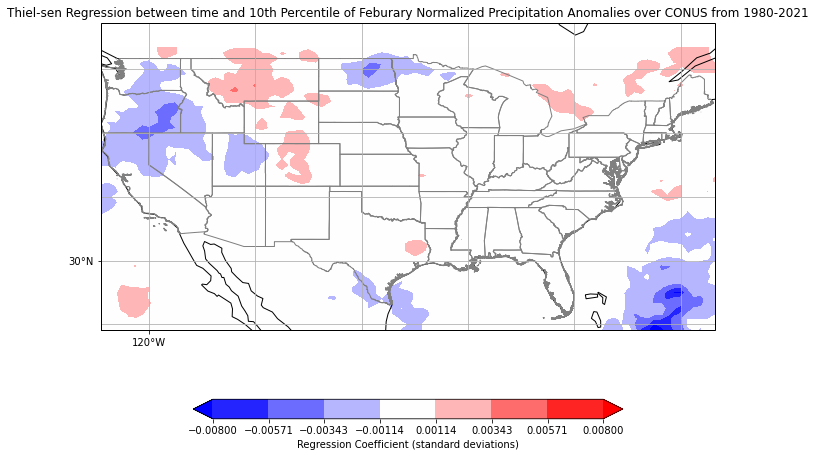

In [32]:
clevs=np.linspace(-0.008,0.008,8)


fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point
data=m_array_2
data,lon=add_cyclic_point(data,coord=feb_ts_droughts['lon'])
#mask_data,lons=add_cyclic_point(mask_sig,coord=jan_ts['lon'])

# Make a filled contour plot
cs=ax.contourf(lon,feb_ts_droughts['lat'],
            data,clevs,
            transform=ccrs.PlateCarree(),
            cmap='bwr',extend='both')

#ax.contourf(lon,jan_ts['lat'],mask_data,[0,1],
 #           transform = ccrs.PlateCarree(),colors='None',
  #          hatches=['.','.'],extend='both',alpha=0)
# Define the xticks for longtitude 
ax.set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define ytick for latitude
ax.set_yticks(np.arange(-90,91,30),crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')


# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Regression Coefficient (standard deviations)')

# Add title
plt.title('Thiel-sen Regression between time and 10th Percentile of Feburary Normalized Precipitation Anomalies over CONUS from 1980-2021')
#plt.savefig('/homes/areed29/CLIM997/summer22_research/feb95th_thielsen.png')




In [34]:
months=np.arange(0,41,1)
nlons=len(dec_ts_droughts['lon'])
nlats=len(dec_ts_droughts['lat'])
#p_array=np.zeros((nlats,nlons))
#r_array=np.zeros((nlats,nlons))
m_array_12=np.zeros((nlats,nlons))

for i in range(nlons):
    for j in range(nlats): 
        y=dec_ts_droughts[:,j,i]
        slope_thiel, intercept_thiel, low_slope,high_slope=mstats.theilslopes(y, x=months, alpha=0.95)
        #m,b,r,p,e = linregress(months,y)
        m_array_12[j,i]=slope_thiel
        #r_array[j,i]=r
        #p_array[j,i]=p




Text(0.5, 1.0, 'Thiel-sen Regression between time and 10th Percentile of December Normalized Precipitation Anomalies over CONUS from 1980-2021')

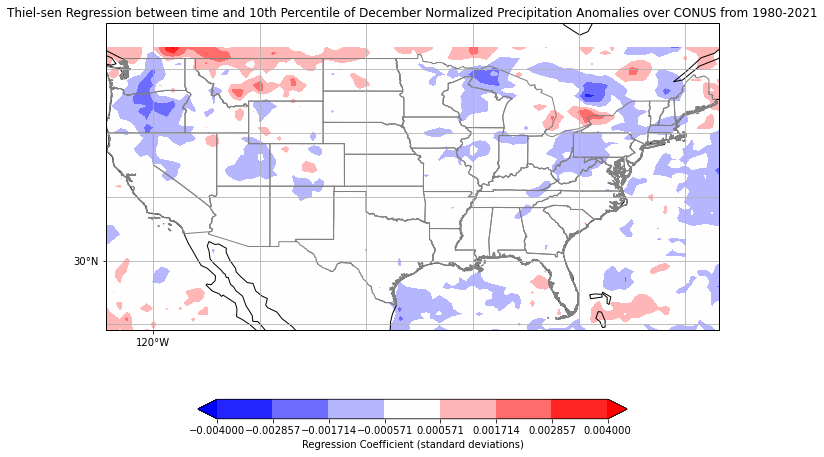

In [36]:
clevs=np.linspace(-0.004,0.004,8)

fig = plt.figure(figsize=(11,8.5))

# Set the axes using the specified map projection
ax=plt.axes(projection=ccrs.PlateCarree(central_longitude=180))

# Add cyclic point
data=m_array_12
data,lon=add_cyclic_point(data,coord=dec_ts_droughts['lon'])
#mask_data,lons=add_cyclic_point(mask_sig,coord=jan_ts['lon'])

# Make a filled contour plot
cs=ax.contourf(lon,dec_ts_droughts['lat'],
            data,clevs,
            transform=ccrs.PlateCarree(),
            cmap='bwr',extend='both')

#ax.contourf(lon,jan_ts['lat'],mask_data,[0,1],
 #           transform = ccrs.PlateCarree(),colors='None',
  #          hatches=['.','.'],extend='both',alpha=0)
# Define the xticks for longtitude 
ax.set_xticks(np.arange(-180,181,60),crs=ccrs.PlateCarree())
lon_formatter=cticker.LongitudeFormatter()
ax.xaxis.set_major_formatter(lon_formatter)

# Define ytick for latitude
ax.set_yticks(np.arange(-90,91,30),crs=ccrs.PlateCarree())
lat_formatter=cticker.LatitudeFormatter()
ax.yaxis.set_major_formatter(lat_formatter)

ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')


# Call colorbar
cbar=plt.colorbar(cs,orientation='horizontal',shrink=0.7,
                 label='Regression Coefficient (standard deviations)')

# Add title
plt.title('Thiel-sen Regression between time and 10th Percentile of December Normalized Precipitation Anomalies over CONUS from 1980-2021')
#plt.savefig('/homes/areed29/CLIM997/summer22_research/dec95th_thielsen.png')




In [3]:
#total field
f='/project/xprecip/merra2_ncfiles/precip/resampled/precip_correct_dailyresample_10-6-22.nc'
DS_precip_totalfield=xr.open_dataset(f)
lat_precip=DS_precip_totalfield['lat']
lon_precip=DS_precip_totalfield['lon']
total_precip_field=DS_precip_totalfield['PRECTOTCORR']
total_precip_field

<xarray.DataArray 'PRECTOTCORR' (time: 3760, lat: 55, lon: 107)>
[22127600 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2021-02-28
  * lon      (lon) float64 -126.9 -126.2 -125.6 -125.0 ... -61.88 -61.25 -60.62
  * lat      (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.0 48.5 49.0 49.5 50.0

In [4]:
xarray_sorted_total=total_precip_field.argsort(axis=0,kind='quicksort')
xarray_sorted_total

<xarray.DataArray 'PRECTOTCORR' (time: 3760, lat: 55, lon: 107)>
array([[[   0,    0,    0, ...,  485,  548,  486],
        [   0,    0,    0, ..., 3030, 2231,  533],
        [   0,    0,    0, ...,  528,  535,  535],
        ...,
        [3343, 1179,  981, ..., 3221, 3363, 3363],
        [ 847, 1473, 1220, ..., 1671, 2797, 3221],
        [2394,  981, 1473, ..., 3143, 2797, 3315]],

       [[2691,  457, 2824, ...,  530,  536, 2948],
        [ 320,  638, 2521, ...,  425,  656,  775],
        [2714, 2366, 2791, ...,  542, 1678,  527],
        ...,
        [1179, 1220,  848, ..., 3562, 3221, 3221],
        [ 848,  848,  847, ...,  321, 3508, 3257],
        [ 981, 1503, 1503, ..., 2293, 3315, 3257]],

       [[2692, 2079, 2817, ...,  579,  728,  531],
        [ 319,  639, 2520, ...,  426, 2230,  774],
        [ 327, 2365, 2790, ...,  543, 2048,  528],
        ...,
...
        ...,
        [ 964,   69,   69, ..., 2345, 3442, 1649],
        [1756, 3612, 1647, ...,  691, 1649, 1512],
        [1757, 1612, 2150, ...,  966,  966,  966]],

       [[3542, 3430, 1489, ..., 2361, 2361, 2361],
        [1255, 1278, 3430, ..., 2361,  159,  159],
        [1255, 1278, 1278, ..., 1202,  159,  159],
        ...,
        [3356, 3356, 1757, ..., 3152, 3152, 3442],
        [3356, 3356,  312, ..., 3152, 3152, 3152],
        [3612, 1621, 1757, ..., 1512, 1512, 1512]],

       [[1489, 1489, 3430, ..., 1202,  161, 3698],
        [1489, 1489, 1489, ..., 1202, 1202, 1202],
        [1489, 1489, 1489, ...,  699, 1202, 1202],
        ...,
        [1756, 1757, 1647, ..., 1512, 1512, 3540],
        [1757, 1757, 1757, ..., 1512, 1512, 2345],
        [  69, 1757,  312, ..., 3152, 3152, 3152]]])
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2021-02-28
  * lon      (lon) float64 -126.9 -126.2 -125.6 -125.0 ... -61.88 -61.25 -60.62
  * lat      (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.0 48.5 49.0 49.5 50.0

In [5]:
sorted_full_field=total_precip_field.where(xarray_sorted_total)
sorted_full_field

<xarray.DataArray 'PRECTOTCORR' (time: 3760, lat: 55, lon: 107)>
array([[[           nan,            nan,            nan, ...,
         3.26724723e-04, 1.92507519e-04, 1.62096214e-04],
        [           nan,            nan,            nan, ...,
         3.51074152e-04, 1.60626718e-04, 1.55040223e-04],
        [           nan,            nan,            nan, ...,
         4.14166134e-04, 2.25233380e-04, 1.74414832e-04],
        ...,
        [4.16522846e-04, 8.34116712e-04, 2.45285779e-03, ...,
         3.67443090e-06, 8.47043964e-07, 1.58423040e-06],
        [8.23043287e-04, 1.32952258e-03, 2.42114440e-03, ...,
         2.63141175e-07, 2.45864896e-07, 3.26737620e-07],
        [1.65691227e-03, 1.01322867e-03, 1.51262060e-03, ...,
         4.10009989e-07, 1.03702553e-06, 2.55844020e-06]],

       [[9.34426092e-10, 2.38799203e-09, 2.77257328e-09, ...,
         2.36860767e-04, 1.24388491e-04, 1.26586528e-04],
        [2.92313529e-09, 1.00310267e-08, 1.20455352e-08, ...,
         3.79866280e-04, 2.40729045e-04, 1.90721315e-04],
        [1.30461846e-08, 3.52166936e-08, 5.74805199e-08, ...,
         8.62320012e-04, 3.82661558e-04, 2.83629808e-04],
...
        [3.46277986e-04, 2.02638315e-04, 9.79690667e-05, ...,
         5.51679307e-07, 1.07047583e-07, 1.99183859e-07],
        [4.52549109e-04, 2.40091977e-04, 9.42607294e-05, ...,
         4.30759115e-07, 1.99149724e-07, 3.56747989e-07],
        [5.40270936e-04, 3.82589875e-04, 1.56397960e-04, ...,
         6.93082370e-07, 9.28757572e-07, 1.60236982e-06]],

       [[2.96948478e-04, 4.49720770e-04, 5.35041094e-04, ...,
         5.47851960e-05, 6.94653572e-05, 7.40187170e-05],
        [3.50341201e-04, 5.79325482e-04, 5.86874783e-04, ...,
         6.04068264e-05, 6.14071905e-05, 6.05014575e-05],
        [4.13639471e-04, 7.36783259e-04, 6.85952604e-04, ...,
         6.79992518e-05, 6.22254229e-05, 6.64968538e-05],
        ...,
        [4.65042889e-04, 5.66793606e-04, 8.97243619e-04, ...,
         2.16704234e-03, 2.43270886e-03, 2.57884944e-03],
        [1.22643262e-03, 1.27868354e-03, 1.14181638e-03, ...,
         1.61016476e-03, 1.96978520e-03, 2.37810053e-03],
        [2.00992823e-03, 1.23058259e-03, 5.87634742e-04, ...,
         1.11576309e-03, 1.38840335e-03, 1.58186001e-03]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2021-02-28
  * lon      (lon) float64 -126.9 -126.2 -125.6 -125.0 ... -61.88 -61.25 -60.62
  * lat      (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.0 48.5 49.0 49.5 50.0

In [7]:
all_10th_vals=[]
for i in range(1980,2022,1):
    year_of_data = sorted_full_field.sel(time = slice(str(i)+"-01-01",str(i)+"-12-31"))
    conus_10th_precip=year_of_data.quantile(0.10,dim='time')
    all_10th_vals.append(conus_10th_precip)
    #print(conus_95th_precip_anoms)

In [8]:
time_array=np.arange(1980,2022,1)
time_array

array([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990,
       1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001,
       2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021])

In [9]:
droughts_xarray=xr.DataArray(all_10th_vals,coords={'time': time_array,'lat':sorted_full_field['lat'],'lon':sorted_full_field['lon']},dims=['time','lat','lon'])
droughts_xarray

<xarray.DataArray (time: 42, lat: 55, lon: 107)>
array([[[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         8.75160913e-06, 5.13123496e-06, 6.22680272e-06],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         8.27978693e-06, 7.59843624e-06, 9.36771266e-06],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         8.06482785e-06, 8.42375903e-06, 1.01218793e-05],
        ...,
        [1.72164655e-05, 8.52385620e-06, 5.88600915e-06, ...,
         1.87066616e-05, 2.62615982e-05, 4.30374643e-05],
        [8.48159470e-06, 1.68417046e-06, 4.59403600e-06, ...,
         1.05704598e-05, 2.40480595e-05, 3.43601365e-05],
        [2.54832412e-06, 6.98343683e-07, 3.36912763e-06, ...,
         6.21871663e-07, 9.18898877e-06, 2.28626595e-05]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.02588769e-05, 1.67727383e-05, 2.11478029e-05],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.08277798e-05, 1.72529195e-05, 1.86747980e-05],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         1.37748156e-05, 1.41922719e-05, 1.14837425e-05],
...
        [1.02728445e-05, 3.30207622e-05, 2.68849362e-05, ...,
         5.48547632e-06, 6.48380956e-06, 7.33141178e-06],
        [8.94081313e-05, 1.09710963e-04, 9.58958335e-05, ...,
         4.44562875e-06, 3.74174715e-06, 3.76280150e-06],
        [1.42753284e-04, 1.39191136e-04, 7.61587144e-05, ...,
         2.17039951e-06, 3.75182617e-06, 4.64525374e-06]],

       [[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         5.77998126e-06, 3.76336629e-06, 4.52524982e-06],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         2.73641263e-06, 1.09196292e-06, 1.48311824e-06],
        [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, ...,
         2.53179242e-06, 6.67203949e-07, 1.14411587e-06],
        ...,
        [9.84721100e-06, 5.97478247e-06, 1.64649775e-05, ...,
         4.52415652e-06, 3.51098156e-06, 5.20402746e-06],
        [9.38463509e-06, 9.98657542e-06, 2.10014383e-05, ...,
         3.49949350e-06, 3.75208579e-06, 5.19589012e-06],
        [1.92355525e-05, 1.48837837e-05, 8.41108604e-06, ...,
         1.41795340e-06, 1.77951285e-06, 2.85323063e-06]]])
Coordinates:
  * time     (time) int64 1980 1981 1982 1983 1984 ... 2017 2018 2019 2020 2021
  * lat      (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.0 48.5 49.0 49.5 50.0
  * lon      (lon) float64 -126.9 -126.2 -125.6 -125.0 ... -61.88 -61.25 -60.62

Text(0.5, 1.0, '10th Percentile of Daily Precipitation over CONUS (Droughts)')

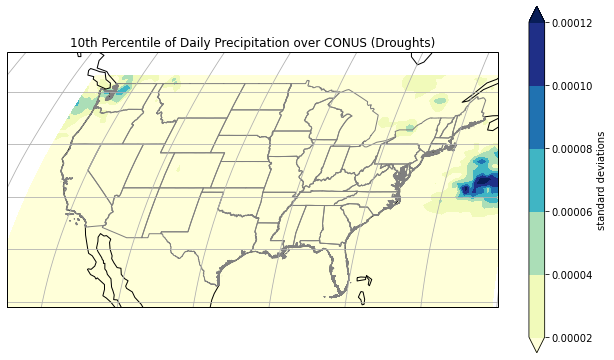

In [14]:
#specific year
fig = plt.figure(figsize=(11,8.5))
ax=plt.axes(projection=ccrs.Robinson())
#clevs=np.linspace(-0.60,0.60,10)
cs=ax.contourf(droughts_xarray['lon'], droughts_xarray['lat'], droughts_xarray[-1,:,:],transform = ccrs.PlateCarree(),cmap='YlGnBu',extend='both')
ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')
cbar=plt.colorbar(cs, shrink=0.75,label='standard deviations')
plt.title('10th Percentile of Daily Precipitation over CONUS (Droughts)')

In [11]:
mean_10th=droughts_xarray.mean(dim='time')
mean_10th

<xarray.DataArray (lat: 55, lon: 107)>
array([[3.29813995e-07, 3.30790574e-07, 2.52411097e-07, ...,
        5.78009720e-06, 5.02263914e-06, 7.19157715e-06],
       [2.08637206e-07, 1.47361112e-07, 1.44654295e-07, ...,
        4.55058720e-06, 4.30041850e-06, 6.24774313e-06],
       [3.11785871e-07, 2.22879299e-07, 1.89460188e-07, ...,
        4.51009955e-06, 4.00504269e-06, 5.38429265e-06],
       ...,
       [2.92576342e-05, 2.41277271e-05, 1.81859736e-05, ...,
        1.83266467e-05, 2.10160540e-05, 2.95242335e-05],
       [3.12312756e-05, 2.29464380e-05, 2.27675056e-05, ...,
        1.17985537e-05, 1.84552533e-05, 2.23596687e-05],
       [4.41777190e-05, 4.01352936e-05, 2.37897605e-05, ...,
        4.11361100e-06, 7.88338315e-06, 1.16641285e-05]])
Coordinates:
  * lat      (lat) float64 23.0 23.5 24.0 24.5 25.0 ... 48.0 48.5 49.0 49.5 50.0
  * lon      (lon) float64 -126.9 -126.2 -125.6 -125.0 ... -61.88 -61.25 -60.62

Text(0.5, 1.0, 'Time-mean 10th Percentile of Daily Precipitation over CONUS (Droughts)')

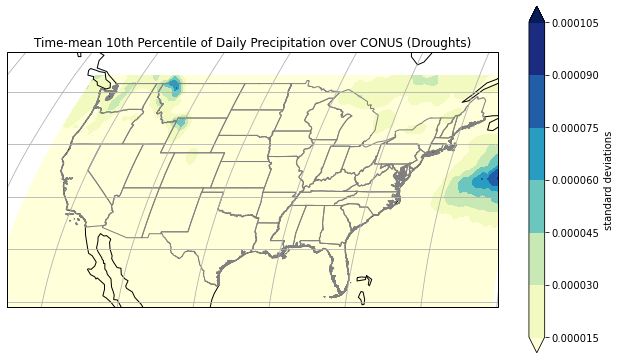

In [13]:
#specific year
fig = plt.figure(figsize=(11,8.5))
ax=plt.axes(projection=ccrs.Robinson())
#clevs=np.linspace(-0.60,0.60,10)
cs=ax.contourf(mean_10th['lon'], mean_10th['lat'], mean_10th[:,:],transform = ccrs.PlateCarree(),cmap='YlGnBu',extend='both')
ax.set_extent([-124.5,-66.8,23.486,49])
ax.coastlines()
ax.gridlines()
us_shapes = list(shpreader.Reader("/scratch/areed29/gadm36_USA_shp/gadm36_USA_1.shp").geometries())
ax.add_geometries(us_shapes, ccrs.PlateCarree(), edgecolor='gray',
                  facecolor='none')
cbar=plt.colorbar(cs, shrink=0.75,label='standard deviations')
plt.title('Time-mean 10th Percentile of Daily Precipitation over CONUS (Droughts)')